In [ ]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
from IPython import get_ipython


In [45]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # dataviz
import seaborn as sns # dataviz
from pandas.plotting import scatter_matrix

Rental= pd.read_csv("./dataset/immo_data.csv")

get_ipython().run_line_magic('matplotlib', 'inline')


In [ ]:
Rental.describe() #shows a summary of the numerical attributes


In [47]:
Berlin=Rental.loc[Rental["regio2"]=='Berlin']
print(Berlin)


regio1  serviceCharge                     heatingType telekomTvOffer  \
19      Berlin         250.00                   floor_heating  ONE_YEAR_FREE   
48      Berlin         125.00                district_heating  ONE_YEAR_FREE   
85      Berlin         230.00                     gas_heating  ONE_YEAR_FREE   
104     Berlin         105.00                 central_heating  ONE_YEAR_FREE   
151     Berlin         206.00                 central_heating  ONE_YEAR_FREE   
...        ...            ...                             ...            ...   
268729  Berlin         100.00                 central_heating  ONE_YEAR_FREE   
268800  Berlin         350.00                 central_heating  ONE_YEAR_FREE   
268831  Berlin          80.04  self_contained_central_heating  ONE_YEAR_FREE   
268834  Berlin         324.47                 central_heating  ONE_YEAR_FREE   
268848  Berlin         233.08                 central_heating  ONE_YEAR_FREE   

        telekomHybridUploadSpeed  newlyConst  b

In [48]:
corr_matrix = Berlin.corr()
corr_matrix["totalRent"].sort_values(ascending=False)


totalRent                   1.000000
baseRent                    0.876431
livingSpace                 0.747748
serviceCharge               0.701983
baseRentRange               0.630741
livingSpaceRange            0.629388
noRoomsRange                0.517548
heatingCosts                0.439351
noRooms                     0.415801
picturecount                0.297007
hasKitchen                  0.220137
lift                        0.197116
yearConstructedRange        0.179634
balcony                     0.145889
cellar                      0.105148
newlyConst                  0.097460
garden                      0.097199
floor                       0.068278
yearConstructed             0.066111
numberOfFloors              0.041601
lastRefurbish               0.034407
pricetrend                  0.015857
electricityBasePrice        0.006113
electricityKwhPrice        -0.006113
scoutId                    -0.025795
noParkSpaces               -0.038506
telekomUploadSpeed         -0.062011
t

In [49]:
Berlin.corr()["baseRent"].sort_values(ascending=False)


baseRent                    1.000000
totalRent                   0.876431
livingSpace                 0.830674
serviceCharge               0.734748
baseRentRange               0.731546
livingSpaceRange            0.704301
noRoomsRange                0.583292
heatingCosts                0.571913
noRooms                     0.475541
picturecount                0.335906
hasKitchen                  0.266178
lift                        0.225659
yearConstructedRange        0.177993
balcony                     0.170298
cellar                      0.122512
newlyConst                  0.118501
garden                      0.106234
floor                       0.072635
yearConstructed             0.056400
numberOfFloors              0.051537
lastRefurbish               0.046471
pricetrend                  0.014995
electricityBasePrice        0.006246
scoutId                    -0.005969
electricityKwhPrice        -0.006246
noParkSpaces               -0.043217
telekomUploadSpeed         -0.079268
t

In [ ]:
attributes = ["baseRent","totalRent","livingSpace", "serviceCharge", "noRooms","heatingCosts","picturecount"]
scatter_matrix(Berlin[attributes], figsize=(16, 12))
scatter_matrix


In [ ]:
Berlin["totalRent"].describe()


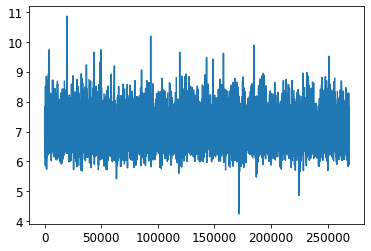

In [50]:
plt.plot(np.log(Berlin["totalRent"]))


Text(0, 0.5, 'Count')

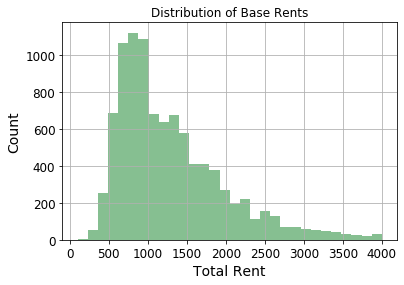

In [51]:
Berlin['totalRent'].hist(bins=30, range=(100,4000), grid=True, color='#86bf91')
plt.title('Distribution of Base Rents')
plt.xlabel('Total Rent')
plt.ylabel('Count')


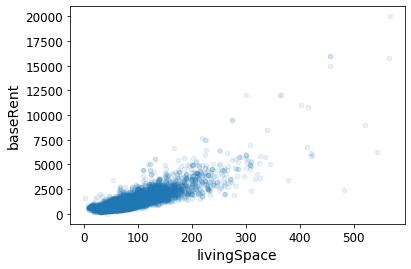

In [52]:
Berlin.plot(kind="scatter", x="livingSpace", y="baseRent", alpha=0.1)


In [53]:
m=Berlin.groupby(['regio3'])['baseRent'].mean()
m.sort_values()


regio3
Marzahn_Marzahn                           500.651438
Hellersdorf_Hellersdorf                   546.908897
Haselhorst_Spandau                        608.990000
Staaken_Spandau                           610.255091
Neu_Hohenschönhausen_Hohenschönhausen     612.841250
                                            ...     
Rummelsburg_Lichtenberg                  1776.020000
Dahlem_Zehlendorf                        1808.883448
Gatow_Spandau                            1825.090000
Mitte_Mitte                              1896.462699
Grunewald_Wilmersdorf                    2449.683763
Name: baseRent, Length: 79, dtype: float64

In [54]:
#droping initial columns
cols_to_drop = ["telekomHybridUploadSpeed", "picturecount", "telekomUploadSpeed",
                "geo_bln", "houseNumber", "geo_krs", "geo_plz", "regio3", "description",
                "facilities"]

Berlin = Berlin.drop(cols_to_drop, axis=1)

#Columns with several NULL entries are dropped too.

Berlin.isna().sum()

#filter columns for berlin
Berlin = Berlin[Berlin["regio2"]=="Berlin"]

#sorting and re_indexing regarding to the price
Berlin = Berlin.sort_values(by=['totalRent'])
Berlin = Berlin.reset_index(drop=True)

#filter some columns between specific amount of values
Berlin = Berlin.query("totalRent >= 100").query("totalRent<10000")
Berlin = Berlin.query("baseRent >= 100").query("baseRent<10000")
Berlin = Berlin.query("livingSpace >= 10").query("livingSpace<400")
Berlin = Berlin.query("noRooms >= 0").query("noRooms<15")




# Replacing columns with f/t with 0/1
Berlin.replace({False: 0, True: 1}, inplace=True)


In [55]:
#make a single binary variable to indicate if the apartment is refurbished/new
Berlin['refurbished'] = (Berlin.condition == 'refurbished') | (Berlin.condition == 'first_time_use') | (Berlin.condition == 'mint_condition') | (Berlin.condition == 'fully_renovated') | (Berlin.condition == 'first_time_use_after_refurbishment')

#make a binary variable to indicate if the rental property has good interior
Berlin['greatInterior'] = (Berlin.interiorQual == 'sophisticated') | (Berlin.interiorQual == 'luxury')

#make a binary variable to indicated if the rental property has good heating
Berlin['goodHeating'] = (Berlin.heatingType == 'central_heating') | (Berlin.heatingType == 'floor_heating') | (Berlin.heatingType == 'self_contained_central_heating')

#make a binary variable to identify rental ads from last year to factor in any inflationary effects.
Berlin['2018_ads'] = (Berlin.date == 'Sep18')

#transform totalRent into log(totalRent) to get a better distribution + better interpretive quality
Berlin['logRent'] = np.log(Berlin['totalRent'])


In [56]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

print(Berlin[X_var])
#y = Berlin[y_var].iloc[:,0].values
#X = Berlin[X_var].iloc[:,0].values
y = Berlin[y_var].values
X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)


balcony  hasKitchen  cellar  livingSpace  noRooms  garden  refurbished  \
3           1           1       0        39.55      1.0       0        False   
4           0           0       0        18.56      1.0       0        False   
5           0           0       0        24.31      1.0       0        False   
6           1           0       0        30.33      1.0       0        False   
7           0           0       0        26.52      1.0       0        False   
...       ...         ...     ...          ...      ...     ...          ...   
9723        1           1       1       335.00      5.0       0         True   
9725        1           1       0       326.35      5.0       1         True   
9726        1           1       1       220.00      6.0       0        False   
9727        0           1       1       307.00      5.0       1        False   
9729        1           1       1       274.00      5.0       0        False   

      greatInterior  newlyConst  2018_ads  li

# Jumo to the Random Forest

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def linearregression(xtrain, ytrain, xtest, ytest):
    linreg = LinearRegression()
    linreg.fit(xtrain, ytrain)
    y_pred = linreg.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred))

linearregression(X_train, y_train, X_test, y_test)


In [ ]:

#RANDOM FOREST
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

#Best hyperparamters from the Random Search:
#minsamleaf: 30, maxfeat: 11, maxdepth: 24 

def randomforestreg(msl, mf, md, xtrain, ytrain, xtest, ytest):
    rfr_best = RandomForestRegressor(n_estimators=70, random_state=1111,
                                     max_depth=md, max_features=mf, min_samples_leaf=msl)
    rfr_best.fit(xtrain,ytrain)
    y_pred_rfr = rfr_best.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred_rfr))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred_rfr))
    
randomforestreg(30, 11, 24, X_train, y_train, X_test, y_test)


In [ ]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingRegressor

#Best hyperparameters from Random Search:
#maxdepth: 16, minsamleaf: 117, n: 73, maxfeat: 10, lr: 0.07
def gradientboostingmachine(md, msl, n, mf, lr, xtrain, ytrain, xtest, ytest):
    gbm_best = GradientBoostingRegressor(n_estimators=n, random_state=1111,
                                         max_depth=md, max_features=mf, 
                                         min_samples_leaf=msl, learning_rate=lr
                                         )
    gbm_best.fit(xtrain, ytrain)
    y_pred_gbm = gbm_best.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred_gbm))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred_gbm))
    
gradientboostingmachine(16, 117, 73, 10, 0.07, X_train, y_train, X_test, y_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()


scores = cross_val_score(lin_reg, X_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)

# find root mean squared error, scores is an array of negative numbers
rmse_scores = np.sqrt(-scores)

print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())


## more models

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)


In [ ]:
Berlin[X_var]["livingSpace"]

In [ ]:
Berlin[y_var].head()

In [78]:

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
#linear_regressor.fit(np.array(X_train.reshape(-1, 1)), y_train.reshape(-1, 1))
linear_regressor.fit(X_train, y_train)

y_predict = linear_regressor.predict(X_test)

In [ ]:
# Plot points and fit line for training data
plt.scatter(X_train, y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_train.reshape(-1, 1), linear_regressor.predict(X_train.reshape(-1, 1)), color='grey', label='Fit Regression Line')
plt.title('totalRent vs livingSpace')
plt.xlabel('livingSpace (in qm)')
plt.ylabel('totalRent (in USD)')

# plot scatter points and line for test data
plt.scatter(X_test, y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()

In [ ]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3:4].values



## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [ ]:
# linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X, y)

# polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

In [ ]:
plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X, linear_reg_model.predict(X), label='Linear regressor fit curve')
plt.plot(X, poly_reg_model.predict(poly_reg.fit_transform(X)), label='Polynmial regressor fit line')
plt.title('totalRent vs livingSpace')
plt.xlabel('livingSpace')
plt.ylabel('totalRent')

plt.legend()
plt.show()

## Simple Vector Regression

In [ ]:
from sklearn.svm import SVR

scale_X = StandardScaler()
scale_y = StandardScaler()

X = scale_X.fit_transform(X)
y = scale_y.fit_transform(y.reshape(-1, 1))

In [ ]:
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(X, y)

In [ ]:
plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X, svr_regressor.predict(X), label='SVR regressor')
plt.title('totalRent vs livingSpace (SVR Regression) ))')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.legend()
plt.show()

## Decision Tree - Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X, y)

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X_grid, tree_regressor.predict(X_grid), label='Tree regressor')
plt.title('totalRent vs livingSpace (Tree Regression)')
plt.xlabel('livingSpace')
plt.ylabel('totalRent')

plt.legend()
plt.show()

## Random Forest Regression

In [59]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators = 300, random_state = 42)
forest_regressor.fit(X, y)

RandomForestRegressor(n_estimators=300, random_state=42)

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X_grid, forest_regressor.predict(X_grid), label='Random Forest regressor')
plt.title('totalRent vs livingSpace(Random Forest Regression)')
plt.xlabel('livingSpace')
plt.ylabel('totalRent')

plt.legend()
plt.show()

# Start fine tunning

In [65]:

baseline_preds = X_test
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  12.64


In [66]:
prediction = forest_regressor.predict(X_test)
errors = abs(prediction - y_test)
print("Mean Absoloute Error :", round(np.mean(errors), 2), "degrees.")

Mean Absoloute Error : 0.59 degrees.


In [68]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.67 %.


In [81]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_regressor, X_test, y_test,
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [82]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.30376748 0.27327188 0.29486327 0.32820907 0.32935254 0.31573083
 0.31906271 0.3202901  0.3030384  0.32041627]
Mean: 0.31080025475240347
Standard deviation: 0.01641472165578467


In [83]:
lin_scores = cross_val_score(linear_regressor, X_test, y_test,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.24377635 0.25935232 0.265586   0.25788333 0.25206225 0.25326304
 0.25387893 0.25635166 0.28013076 0.24313075]
Mean: 0.25654153891114756
Standard deviation: 0.010142444158213863


In [87]:
from sklearn.metrics import mean_squared_error

prediction = forest_regressor.predict(X_test)
forest_mse = mean_squared_error(y_test, prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.09563335285869291

In [88]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_regressor, X_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.24482515 0.21938931 0.232267   0.23356006 0.25109605 0.24219493
 0.22747847 0.26195417 0.26236876 0.23391841]
Mean: 0.24090523163703387
Standard deviation: 0.013583894516255201


In [89]:

scores = cross_val_score(linear_regressor, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.256542
std       0.010691
min       0.243131
25%       0.252362
50%       0.255115
75%       0.258985
max       0.280131
dtype: float64

In [90]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_test, y_test)
housing_predictions = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.25523036220945183

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=300, random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [99]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [100]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [101]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.2627947581616145 {'max_features': 2, 'n_estimators': 3}
0.24763724888951982 {'max_features': 2, 'n_estimators': 10}
0.24028232683813686 {'max_features': 2, 'n_estimators': 30}
0.2580238824157983 {'max_features': 4, 'n_estimators': 3}
0.24124154369608614 {'max_features': 4, 'n_estimators': 10}
0.23443303562524423 {'max_features': 4, 'n_estimators': 30}
0.2583907514927055 {'max_features': 6, 'n_estimators': 3}
0.23947731230559638 {'max_features': 6, 'n_estimators': 10}
0.23368380718181064 {'max_features': 6, 'n_estimators': 30}
0.25853131556327813 {'max_features': 8, 'n_estimators': 3}
0.24012592500915955 {'max_features': 8, 'n_estimators': 10}
0.23402756307973488 {'max_features': 8, 'n_estimators': 30}
0.2732000145013969 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.26534755202114835 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.2684210015504716 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.2570468613556833 {'bootstrap': False, 'max_featur

In [102]:
pd.DataFrame(grid_search.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017081,0.003000,0.002299,0.000717,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.071505,-0.067477,-0.068736,-0.063255,-0.074332,-0.069061,0.003744,14
1,0.041616,0.000628,0.003600,0.000112,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.064396,-0.060484,-0.062804,-0.055253,-0.063684,-0.061324,0.003309,8
2,0.120786,0.001909,0.009172,0.000342,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.061798,-0.054941,-0.059254,-0.051751,-0.060934,-0.057736,0.003812,6
3,0.017108,0.000325,0.001974,0.000195,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.071695,-0.063393,-0.065580,-0.060804,-0.071409,-0.066576,0.004336,11
4,0.050389,0.000993,0.003685,0.000167,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.063039,-0.055452,-0.058230,-0.052030,-0.062237,-0.058197,0.004131,7
5,0.153346,0.002020,0.009349,0.000447,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.059071,-0.052174,-0.054984,-0.049765,-0.058800,-0.054959,0.003644,3
6,0.021116,0.000940,0.001835,0.000100,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.071105,-0.064453,-0.065666,-0.062757,-0.069847,-0.066766,0.003192,12
7,0.070371,0.005760,0.004203,0.000543,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.060513,-0.056411,-0.055507,-0.053931,-0.060384,-0.057349,0.002653,4
8,0.182493,0.002569,0.008939,0.000180,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.058289,-0.051959,-0.053038,-0.050714,-0.059040,-0.054608,0.003401,1
9,0.023679,0.000265,0.001832,0.000142,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.070848,-0.065072,-0.065906,-0.061114,-0.071252,-0.066838,0.003803,13


In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3510b0c820>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f35071db9a0>},
                   scoring='neg_mean_squared_error')

In [104]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.2345912379343313 {'max_features': 3, 'n_estimators': 43}
0.2305241937352196 {'max_features': 6, 'n_estimators': 154}
0.2327953566111411 {'max_features': 7, 'n_estimators': 37}
0.2337769638136212 {'max_features': 3, 'n_estimators': 119}
0.23282546436266224 {'max_features': 4, 'n_estimators': 57}
0.2305911934719391 {'max_features': 6, 'n_estimators': 112}
0.24192187878683508 {'max_features': 1, 'n_estimators': 145}
0.23384813621642758 {'max_features': 4, 'n_estimators': 41}
0.2425358013595458 {'max_features': 1, 'n_estimators': 59}
0.24022256127032973 {'max_features': 4, 'n_estimators': 11}


In [105]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.01065457, 0.03849392, 0.01160684, 0.71302731, 0.1129163 ,
       0.00753878, 0.02291906, 0.03802348, 0.01082646, 0.00839429,
       0.02559898])

In [115]:
final_model = grid_search.best_estimator_

#X_test = strat_test_set.drop("median_house_value", axis=1)
#y_test = strat_test_set["median_house_value"].copy()

#X_test_transformed = preparation_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.23325516804875224